# Run the whole deltas algorithm

In [78]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
import deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data and classifier

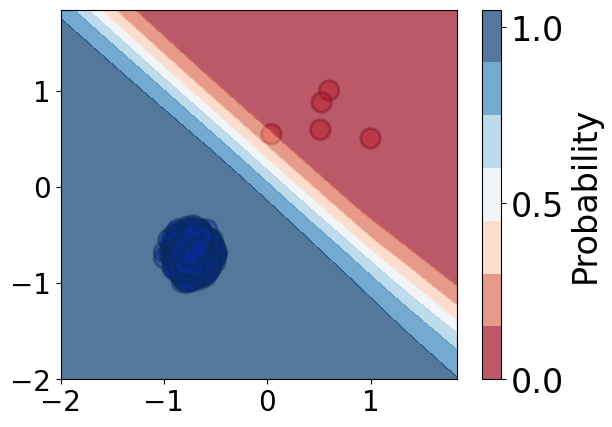

In [79]:
N1 = 10000
N2 = 5
model = 'SVM'
model = 'Linear'
model = 'MLP'
balance_clf = True

data_clf = pipeline.get_data_and_classifier(
    model=model,
    m1=[-10, -10],
    m2=[10, 10],
    cov1=[[1, 0], [0, 1]],
    cov2=[[20, 0], [0, 20]],
    N1=N1,
    N2=N2,
    scale=True,
    balance_clf=balance_clf)

if model == 'SVM':
    print('support vectors:', data_clf['clf'].support_vectors_)

data = data_clf['data']
clf = data_clf['clf']
m1 = data_clf['mean1']
m2 = data_clf['mean2']

In [80]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[2.48744943]])

## Get projection and data we need (R, D, M etc.)

R1 empirical: 0.44836105885539146
R2 empirical: 0.9231509935751439


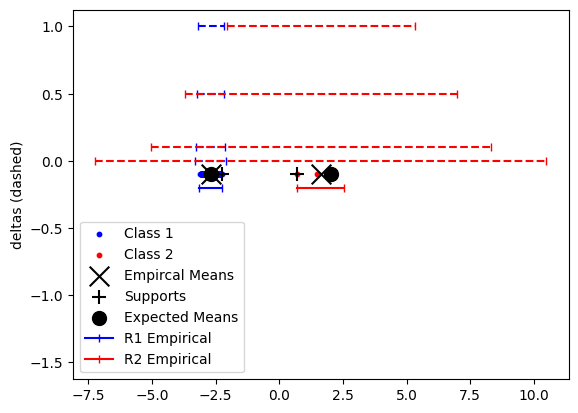

In [81]:
data_info = pipeline.data_project_and_info(
    data=data_clf['data'], m1=data_clf['mean1'], m2=data_clf['mean2'], clf=data_clf['clf'], data_test=data_clf['data_test'])

## set up extra parameters

In [82]:
# Costs
data_info['c1'] = 1
data_info['c2'] = 1
pipeline.print_params(data_info)

Parameters
        R:  3.104289137175445
        N1: 10000
        N2: 10000
        R1: 0.44836105885539146
        R2: 0.9231509935751439
        M:  2.964201677017553
        D:  4.335713729448089
        C1: 1
        C2: 1


## Optimiser

deltas init: [1, 0.9959187058538335]
eq. 7 can be satisfied: True
constraint init: False
Grid Search Optimisation Complete
    delta1 : 0.001001001001002 
    delta2: 0.9999731172641001
    constraint satisfied: False


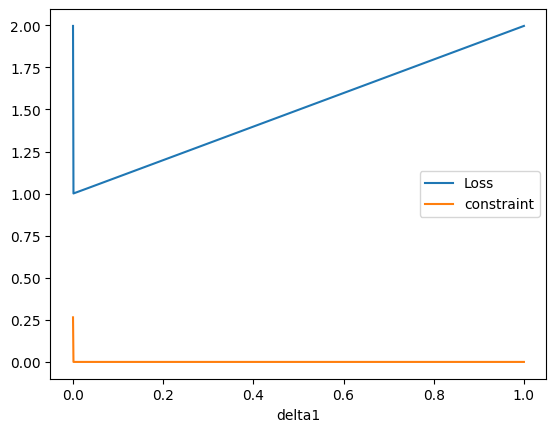

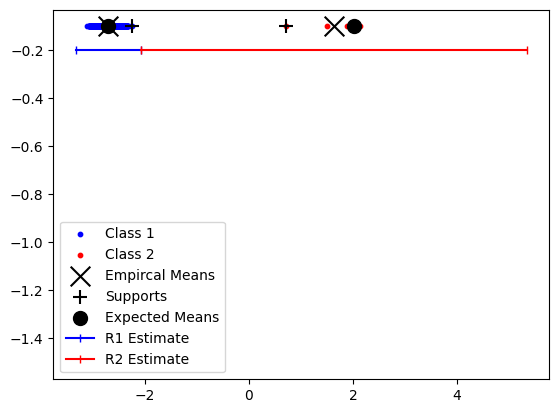

In [83]:

loss_func = deltas.scipy_optim_func   # returns tuple for (loss_func, gradient)
# loss_func only - won't use gradient during optimisation
loss_func = deltas.loss_one_delta

contraint_func = deltas.contraint_eq7
# contraint_func = deltas.contraint_eq8

delta1_from_delta2_func = deltas.delta2_given_delta1_matt

delta1, delta2 = pipeline.optimise(
    data_info, loss_func, contraint_func, delta1_from_delta2_func, grid_search=True)

# Evaluation on test data

original accuracy: 0.998
deltas   accuracy: 1.0


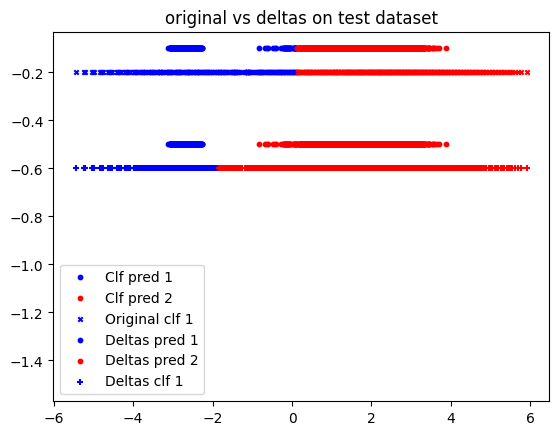

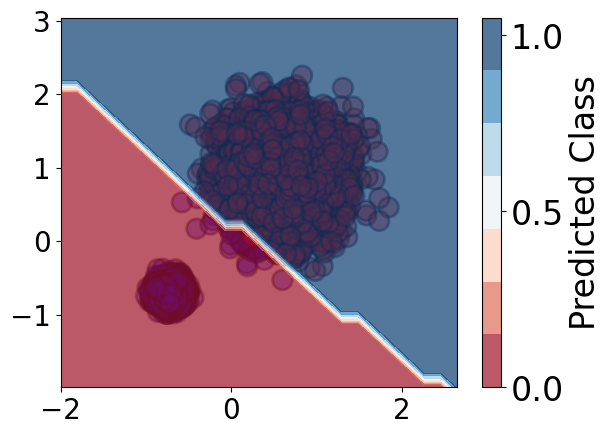

In [84]:
pipeline.eval_test(data_clf, data_info, delta1, delta2)